### Group Name: BRAVO 

| Name | Email (registered with Data Glacier) | Country | College/Company | Specialization |
|----------|----------|----------|----------|----------|
| Jackson Taylor | jacksonian.r.taylor@gmail.com | United States | Santa Clara University | Data Science |
| Balamurugan Purushothaman | balamurugan2001viruda@gmail.com | United Kingdom | University of Liverpool | Data Science |
| Nazrin Thanikattil Rafeeque | 101nazrin@gmail.com | United Kingdom | University of Hertfordshire | Data Science |
| Gunjan Varyani | gunjanvaryani916@gmail.com | United States | University of the Cumberlands | Data Science |

## Problem description:

ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which helps them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

The steps to solving this task include outlining the project, the initial data understanding and strategies to solve data problems, data cleansing and transformation, exploratory data analysis code, exploratory data analysis presentation and model recommendation, model selection and building, and presenting the final solution and code.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from itertools import islice
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency


df = pd.read_csv("bank-additional-full.csv", delimiter=";")



In [80]:
df.duplicated().sum()

np.int64(12)

In [81]:
df.drop_duplicates(keep = 'first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

0
(41176, 21)


In [82]:
bins = [18, 30, 40, 50, 60, 90]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [83]:
contigency = pd.crosstab(df['age_group'],df['y'])

In [84]:
print(contigency)

y             no   yes
age_group             
18-30       4742   920
31-40      15218  1715
41-50       9690   833
51-60       6164   697
61+          715   467


<Axes: xlabel='y', ylabel='age_group'>

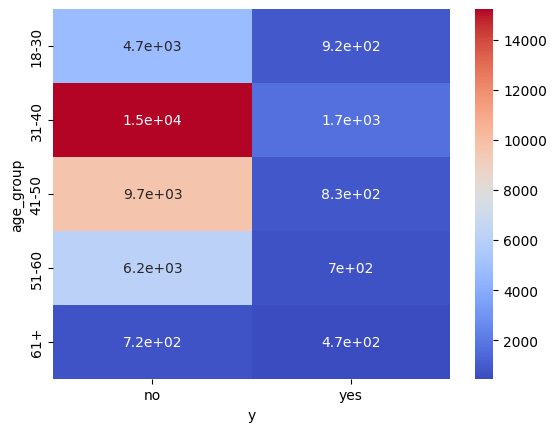

In [85]:
sns.heatmap(contigency, annot=True, cmap='coolwarm')

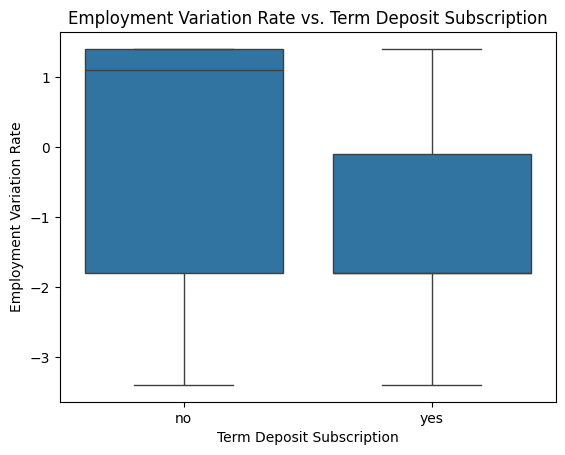

In [86]:
#Plot : 'Employment Variation Rate vs. Term Deposit Subscription'
sns.boxplot(df, x='y', y='emp.var.rate')
plt.title('Employment Variation Rate vs. Term Deposit Subscription')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Employment Variation Rate')
plt.show()
# From the plot, the median Employment Variation Rate for no group is around 1 and around 0.5 for yes group.This indicates  that people who did not subscribe to the term deposit tend ...
# to have higher employment variation rates. 
# This plot suggests that a higher employment variation rate might be associated with a lower likelihood of subscribing to a term deposit.

In [87]:
no_term_deposit= df[df['y'] == 'no']['emp.var.rate']
term_deposit = df[df['y'] == 'yes']['emp.var.rate']


# To quantify the effect of both attributes.Finding the Cohen’s d measure. 

difference_in_mean = no_term_deposit.mean() - term_deposit.mean()
Pooled_standard_deviation = ((no_term_deposit.std()**2 + term_deposit.std()**2) / 2)**0.5
cohen_d = difference_in_mean / Pooled_standard_deviation
print(f"Cohen's d value is = {cohen_d}")


# The score of 0.953 indicates a large impact size, meaning that term deposit subscribers are associated with higher emp.var.rate


# Therefore the dependency of emp.var.rate on term date subscription is both graphically and statistically confirmed.

Cohen's d value is = 0.9531369727829975


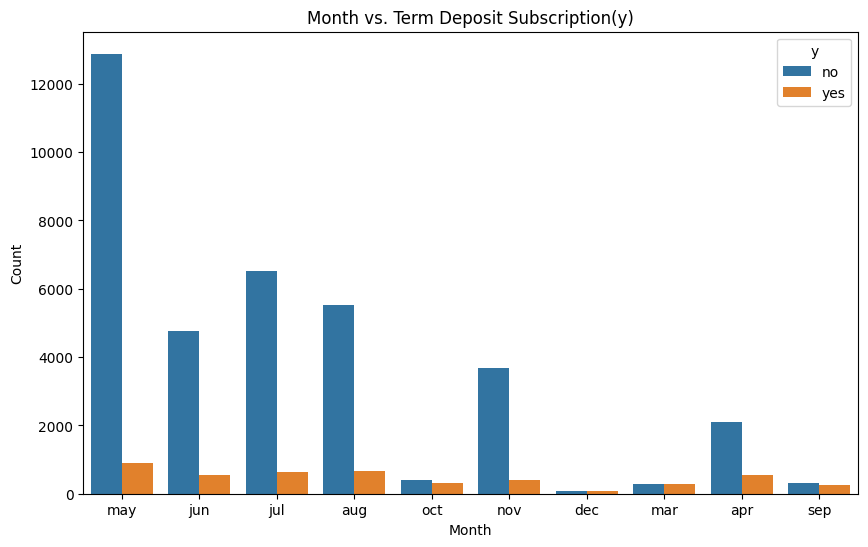

In [88]:
# Month vs. Term Deposit Subscription
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x='month', hue='y')
plt.title('Month vs. Term Deposit Subscription(y)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# High number of contacts have occurred in the month of May ,July and August suggesting a strong marketing campaign had been done. This could be due many factors such as the effectiveness of the campaign,response of the customers.
# However the effectiveness of subscription is not proportional for the month of may
# For the month of July and August ,have high contact volumes, though significantly lower than May, with moderate subscription rates.

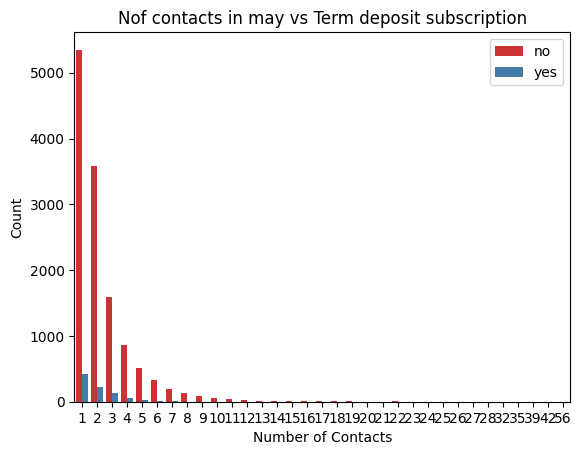

In [89]:
# to understand the non proportionality in no:of contacts in the month of May to subscription evaluating how well the customers are followed up after the first contact. 

df_may = df[df['month'] == 'may']
sns.countplot(data=df_may, x='campaign', hue='y', palette='Set1')
plt.title('Nof contacts in may vs Term deposit subscription')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.legend()
plt.show()
# It is evident that majority of the customers are contacted only once in the month of may.They could have obtained more subscription if the targeted customers are followed up properly.

In [90]:
total_contacts = df.groupby('day_of_week', observed=True)['y'].count()
total_contacts = total_contacts[['mon','tue','wed','thu','fri']]

subscriptions = df[df['y'] == 'yes'].groupby('day_of_week', observed=True)['y'].count()[['mon','tue','wed','thu','fri']]
print(subscriptions)

day_of_week
mon     847
tue     953
wed     949
thu    1044
fri     846
Name: y, dtype: int64


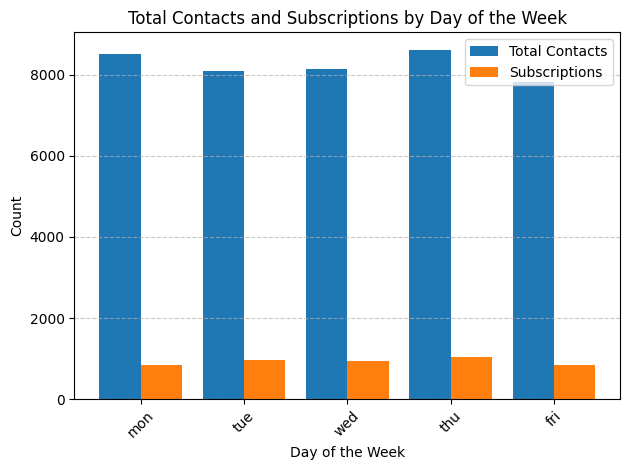

chi-squared test of independence:
P-value: 3.085754965631742e-05
Reject the null hypothesis. day_of_the_week and y are not independent

Day of the week from largest buyer proportion to smallest
day_of_week
thu    0.121142
tue    0.117858
wed    0.116671
fri    0.108101
mon    0.099507
Name: y, dtype: float64


In [91]:
bar_width = 0.4
index = range(len(total_contacts))

plt.bar(index, total_contacts, bar_width, label='Total Contacts')
plt.bar([i + bar_width for i in index], subscriptions, bar_width, label='Subscriptions')


plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Total Contacts and Subscriptions by Day of the Week')
plt.xticks([i + bar_width / 2 for i in index], total_contacts.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Highest number of contacts are made on days like Thursday ,Monday and wednesdays.Highest subscriptions are made on thursdays


# Example contingency table (replace with your actual data)
contingency_table = [df[df['y'] == 'yes']["day_of_week"].value_counts()[['mon','tue','wed','thu','fri']].values, df[df['y'] == 'no']["day_of_week"].value_counts()[['mon','tue','wed','thu','fri']].values]


# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("chi-squared test of independence:")

# Output results
print(f"P-value: {p_val}")


alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. day_of_the_week and y are not independent")
else:
    print("Fail to reject the null hypothesis. day_of_the_week and y are independent")



print("\nDay of the week from largest buyer proportion to smallest")
proportions = (subscriptions/total_contacts)
proportions = proportions.sort_values(ascending=False)
print(proportions)


The days of the week do effect purchase habits.
Largest buyer proportion is on thursday. 
It may be useful to prioritize contacts on thursday.

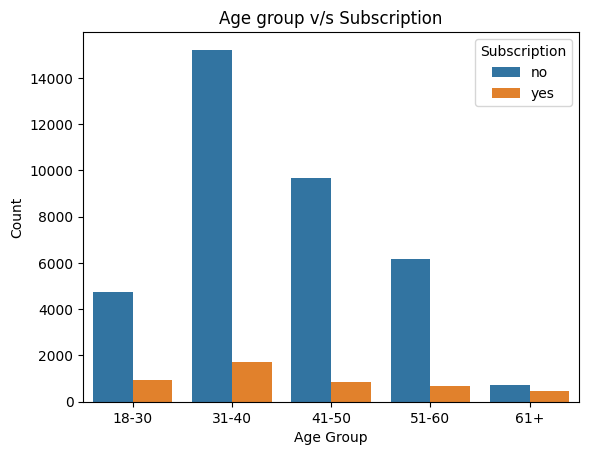

In [92]:
#Defining the bins for age
bins = [18, 30, 40, 50, 60, 90]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

sns.countplot(data=df, x='age_group', hue='y')
plt.title('Age group v/s Subscription')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscription')
plt.show()



Age of 61+ has the highest probability to subscribe.

In [93]:
#print(df['age_group'])

#computing the frequent distribution of age-group an y
contingency_table = pd.crosstab(df['age_group'], df['y'])
print(contingency_table)

# chi-square test
#Assume H0 : Age group and term deposit subscription are independent.
#       H1 : Age group and term deposit subscription are not independent.

#Performing   Chi - square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"The results of Chi-square test are Chi2: {chi2}, p-value: {p}")


# Analysis of result using significance level alpha 
alpha = 0.05  
if p < alpha:
    print("There is a significant association between age group and term deposit subscription status ie; reject H0")
else:
    print("There is no significant association between age group and term deposit subscription status ie; fail to reject H0)")

# Large chi2 value indicating a large difference between the observed and expected frequencies under the null hypothesis 
# Extremely small p value indicate there exist a strong association between age group and subscription

y             no   yes
age_group             
18-30       4742   920
31-40      15218  1715
41-50       9690   833
51-60       6164   697
61+          715   467
The results of Chi-square test are Chi2: 1233.4599104045215, p-value: 8.879372858112848e-266
There is a significant association between age group and term deposit subscription status ie; reject H0


In [94]:
print(expected)

[[ 5024.83413911   637.16586089]
 [15027.46670392  1905.53329608]
 [ 9338.80777921  1184.19222079]
 [ 6088.90622191   772.09377809]
 [ 1048.98515585   133.01484415]]


[[ 5024.83413911   637.16586089]
 [15027.46670392  1905.53329608]
 [ 9338.80777921  1184.19222079]
 [ 6088.90622191   772.09377809]
 [ 1048.98515585   133.01484415]]
y                 no        yes
age_group                      
18-30      -3.989982  11.204838
31-40       1.554275  -4.364783
41-50       3.634119 -10.205488
51-60       0.962353  -2.702520
61+       -10.311990  28.958570


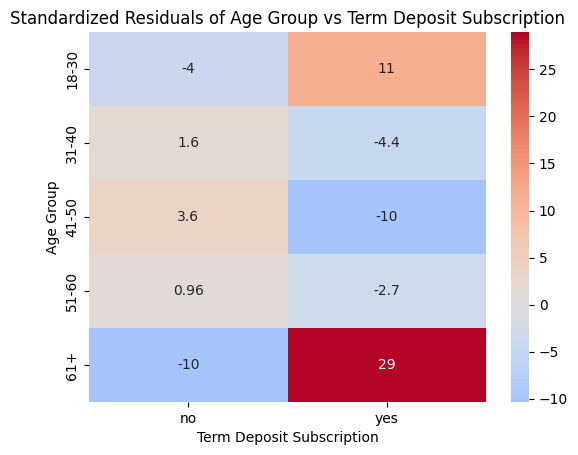

In [95]:
# Calculating standardized residuals to understand which category is contribute most to the chi-square statistic

print(expected)
residuals = (contingency_table - expected) / np.sqrt(expected)
print(residuals)

# Plotting the standardized residuals 
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
plt.title('Standardized Residuals of Age Group vs Term Deposit Subscription')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Age Group')
plt.show()




#### Interpretation
1. Color intensity indicates the deviation from expected values. Blue indicate negative residual (less term deposit subscription than expected ) and red indicate positive residual (more  term deposit than expected).
2. Age group 31 -40 has the highest number of subscriptions, from observed values of 0.19,-0.54  it is inline with expectation .Here the subscription is not usually high or low when compared to the number of people in this group.
3. Surprisingly age group 61+ and 18-30 have high positive residual values indicate they subscribe to term deposits more than expected.
4. Age roup 41-50 are less expected to subscribe with its highly negative residual.

Thus ,Graphically age group 31-40 have highest term deposit subscription count.but, statistically, chi-test indicates that age-group 61+ and 18-30 are expected to have higher subscriptions.Former may be  proportional to their population size in the dataset.


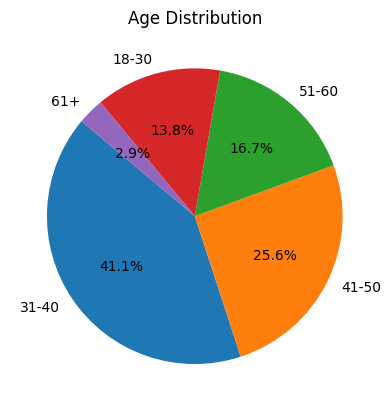

In [96]:
age_counts= df['age_group'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')
plt.show()


From plotting the age distribution in dataset, it is understood that age group 31-40 has the highest number of count, thus chi -test is validated .

Age groups 18-30 and 60+ Despite being smaller segments, they have shown a higher-than-expected interest in subscribing term deposit.

Therefore focusing  marketing efforts on  18-30 and 61+ age groups as prime targets would help the bank most in getting new subscriptions.

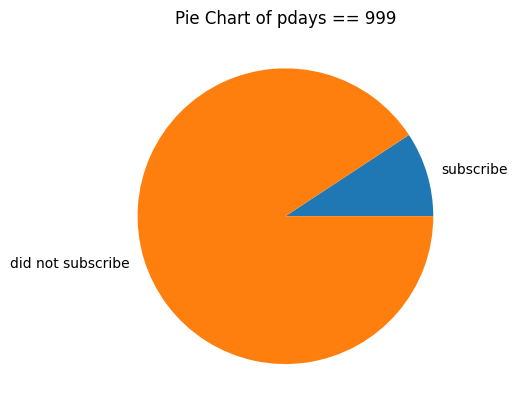

In [97]:
pdays = df['pdays'].unique()

# This is incorrect filtering:
# count1 = ((df['pdays'] == 999) & (df['y'] != 'yes')).value_counts()[True]
# count2 = ((df['pdays'] == 999) & (df['y'] != 'no')).value_counts()[True]

count1 = len(df[(df['pdays'] == 999) & (df['y'] == 'yes')])
count2 = len(df[(df['pdays'] == 999) & (df['y'] == 'no')])


numbers = [count1, count2]
labels = ['subscribe', 'did not subscribe']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of pdays == 999')
plt.show()


Vast majority of customers with pdays == 999 did not subscribe.

Customers that haven't been contacted are much  less likely to subscribe.

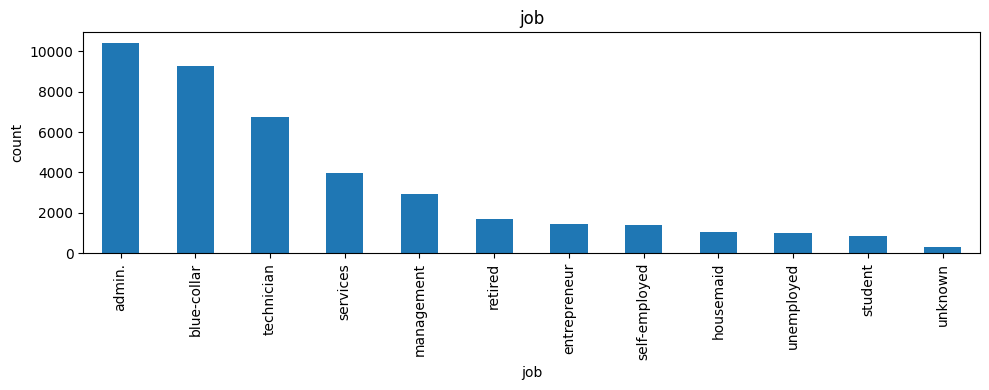

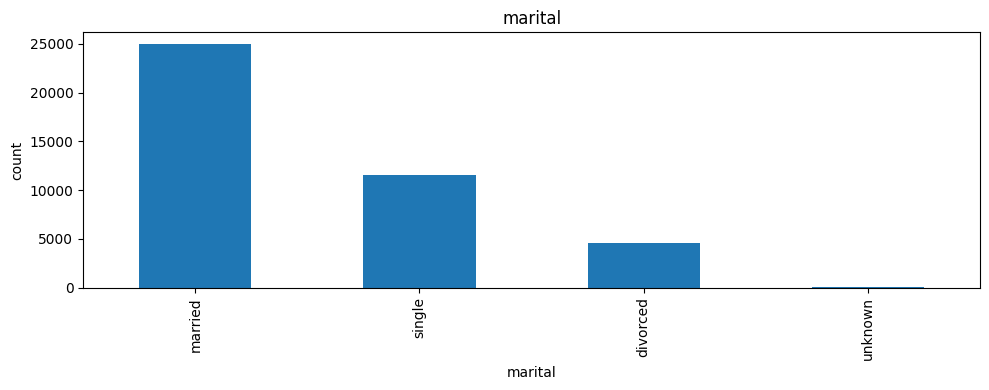

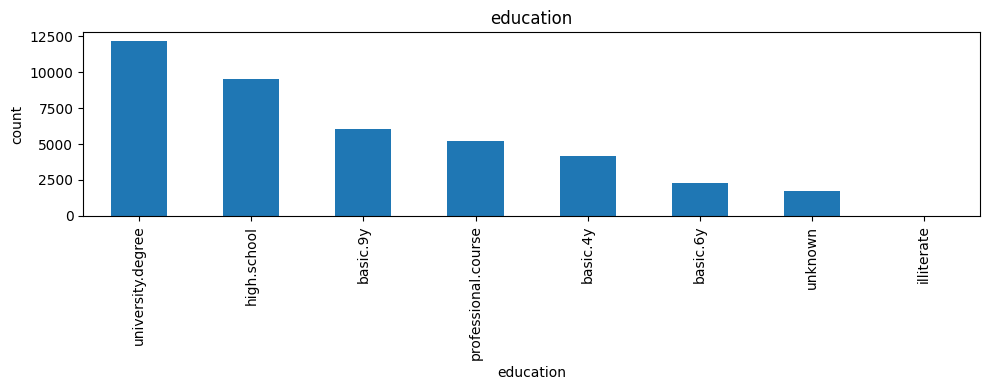

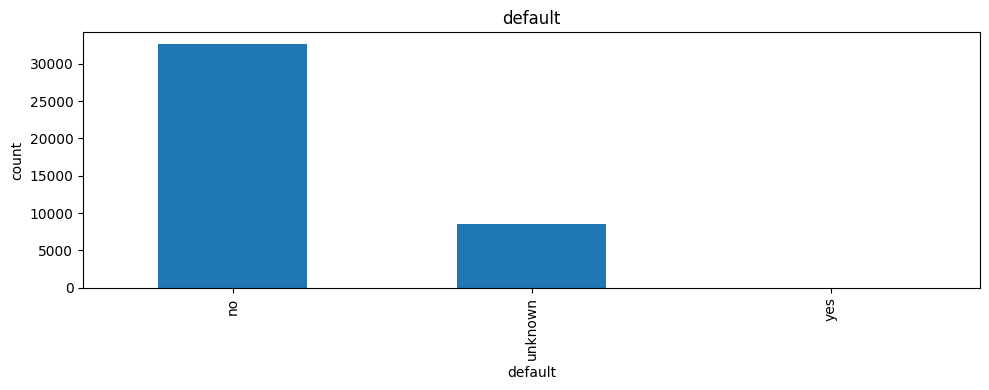

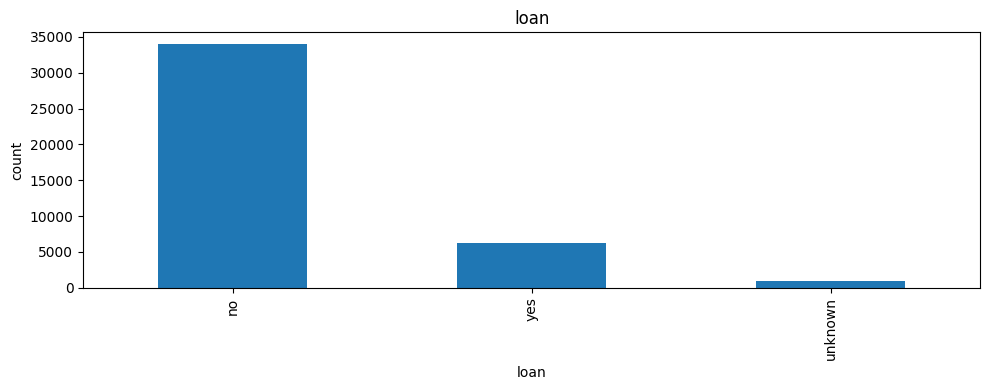

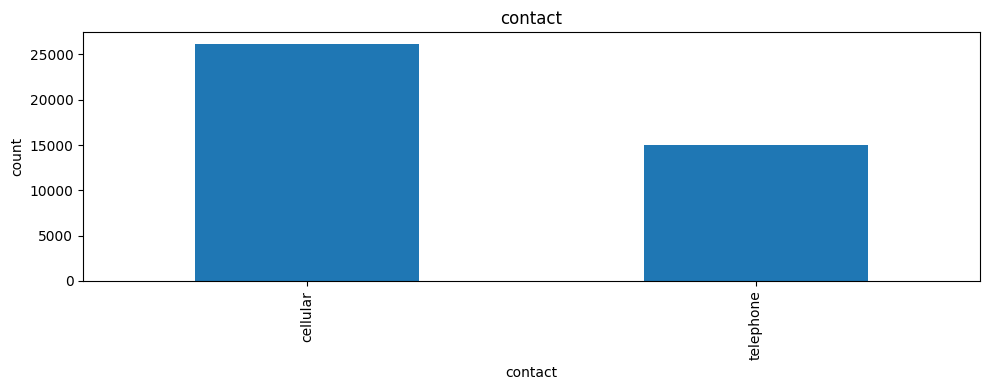

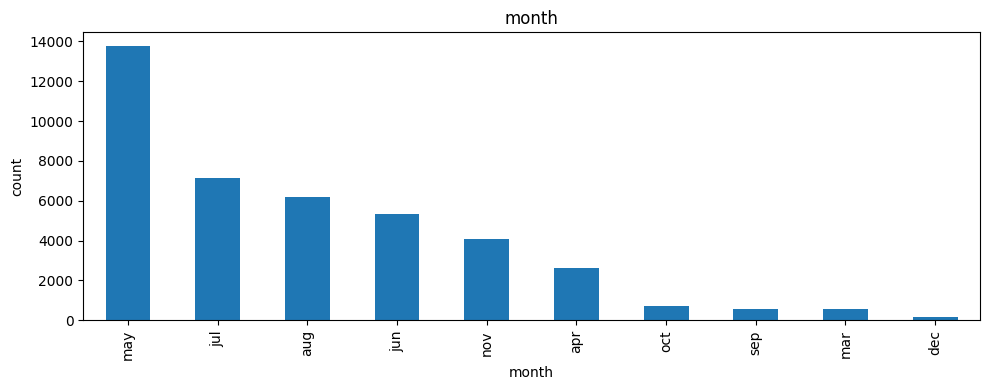

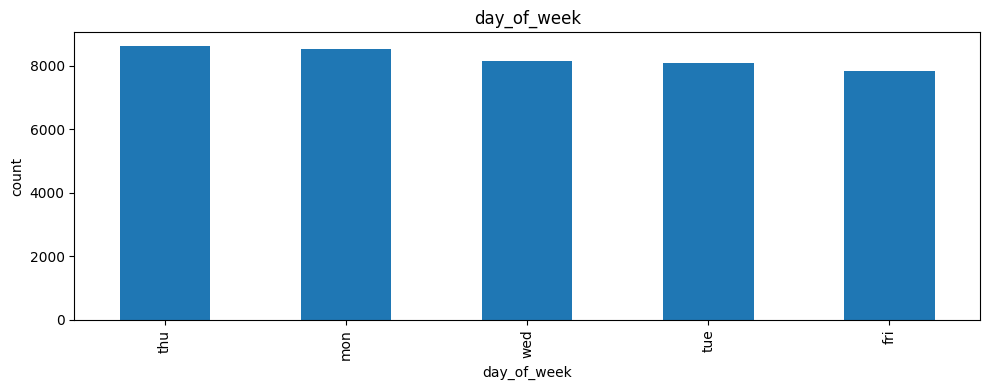

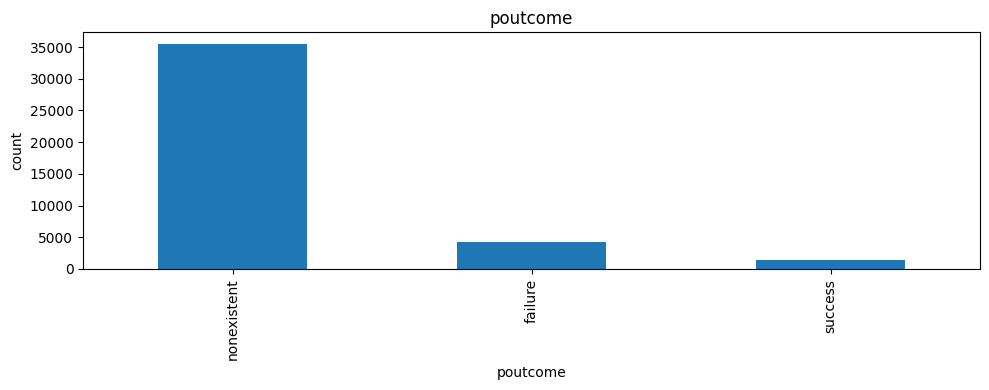

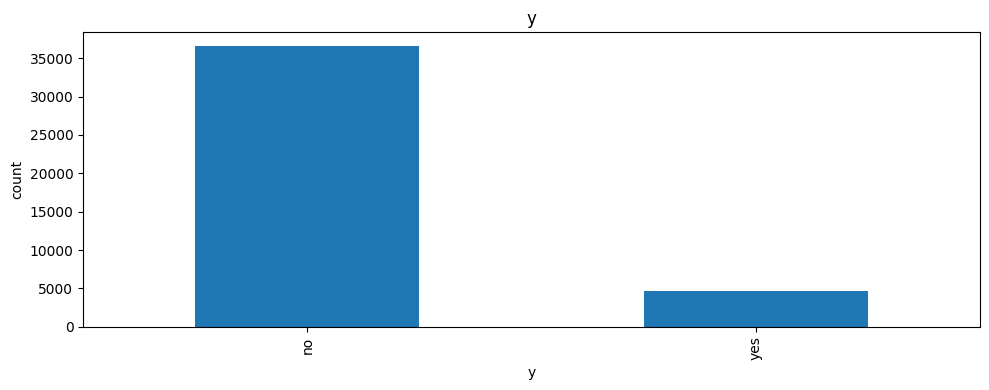

In [98]:
#exploring categorical values

categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

for col in categorical_variables:
    plt.figure(figsize=(10,4))
    df[col].value_counts().plot(kind='bar')
    plt.ylabel("count")
    plt.title(col)
    plt.tight_layout()

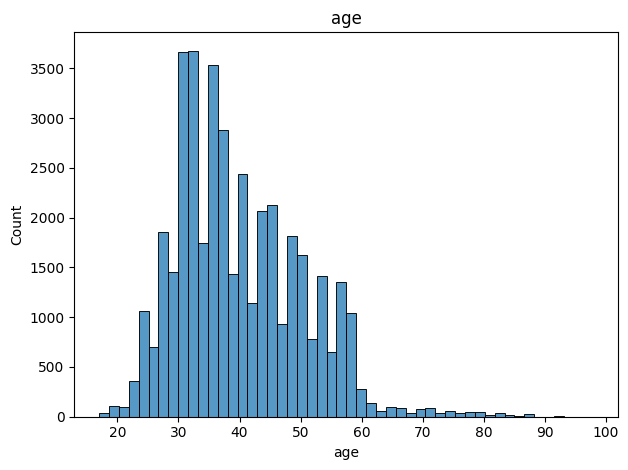

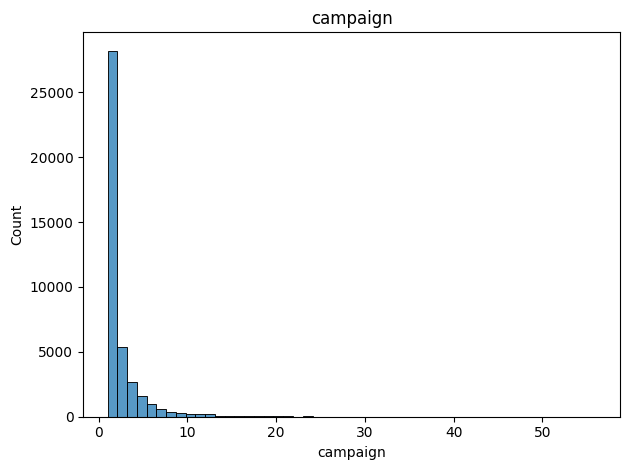

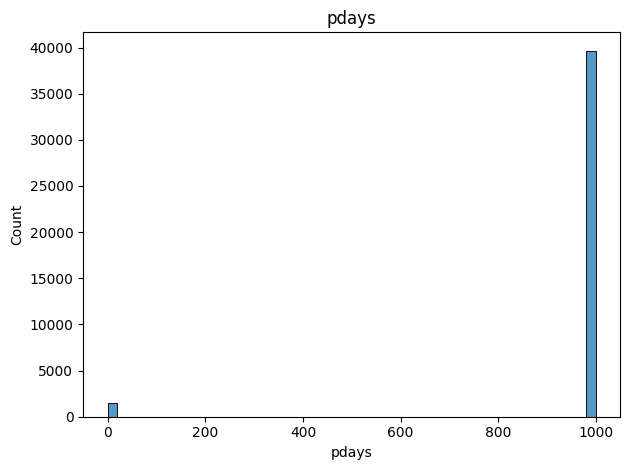

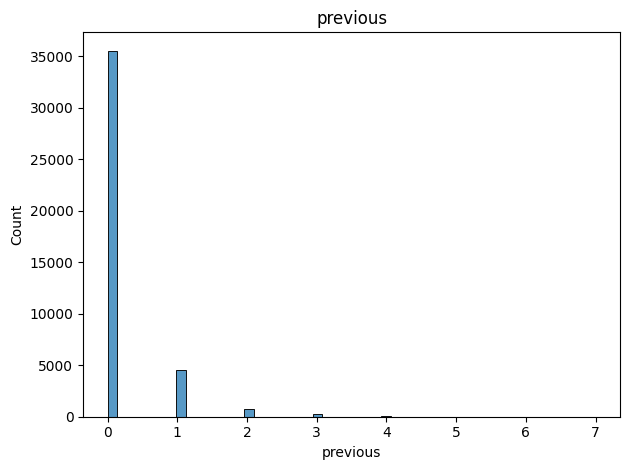

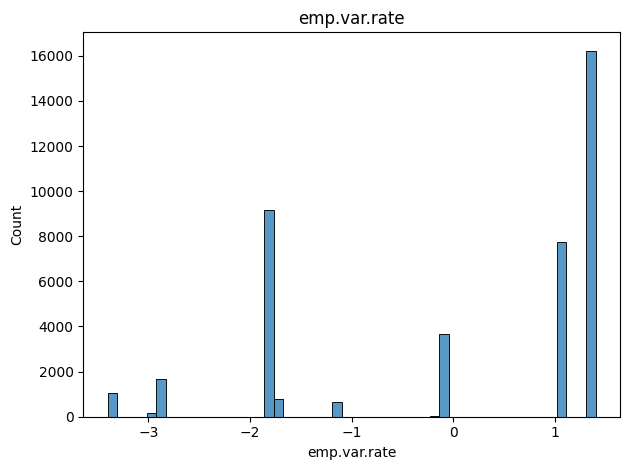

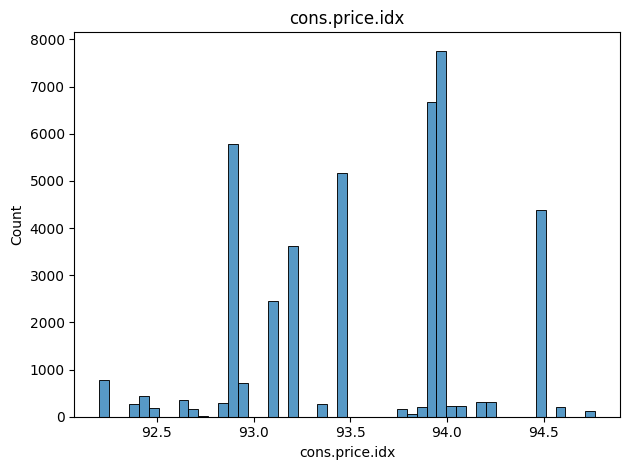

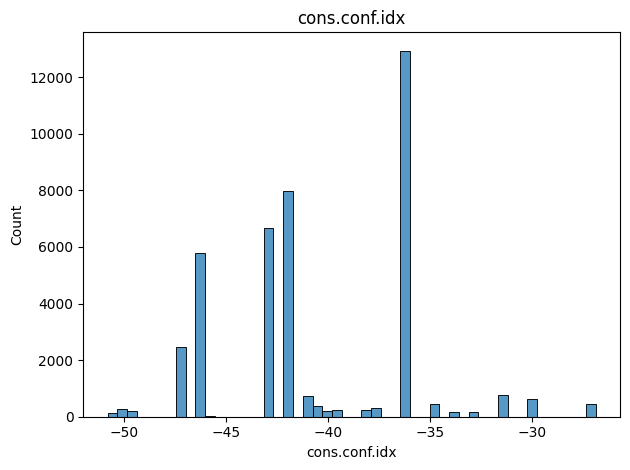

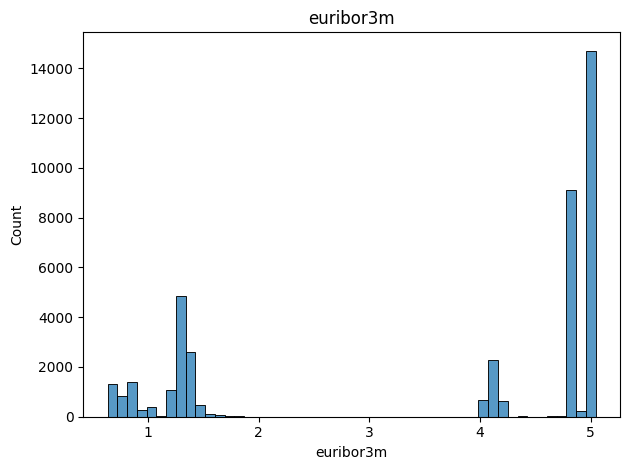

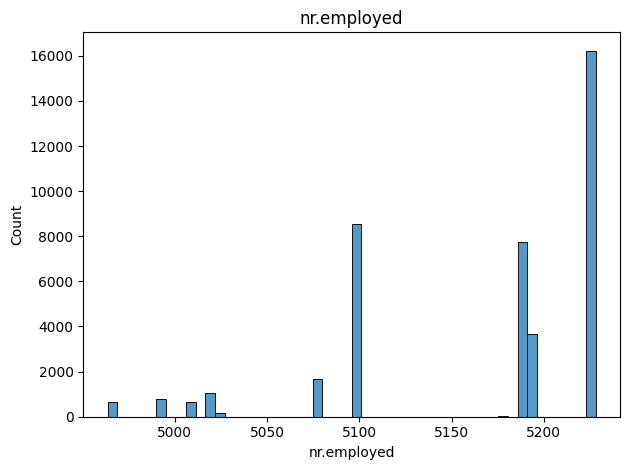

In [99]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']

for col in numerical_variables:
    sns.histplot(data=df, x=col,bins=50, kde=False)
    plt.title(col)
    plt.tight_layout()
    plt.show()

  age_group  count
0     17-25   1665
1     26-40  22096
2     41-60  16506
3       60+    909


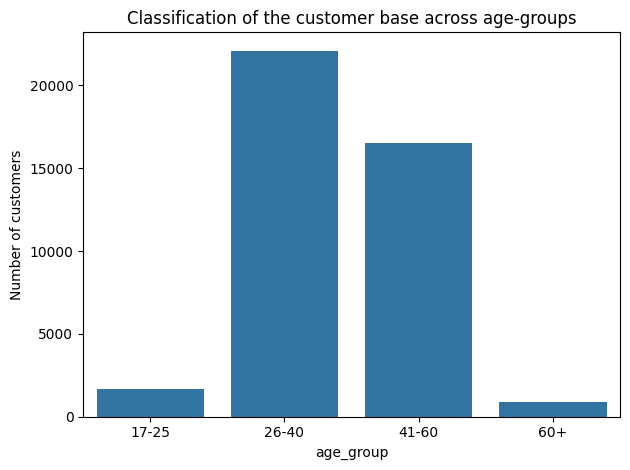

In [100]:
# Adding new age-group column to bank-additional-full data
# min = 17, max = 98 yrs
# 17-25, 26-40, 41-60, 60+ yrs
groups = df['age'].apply(lambda x: '17-25' if x<=25 else ('26-40' if x<=40 else ('41-60' if x<=60 else '60+')))
df['age_group'] = groups

age_group_counts = pd.DataFrame(df.groupby('age_group').age.count()).rename({'age':'count'}, axis = 1).reset_index()
print(age_group_counts)

sns.barplot(x = 'age_group', y = 'count', data = age_group_counts)
plt.title('Classification of the customer base across age-groups')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

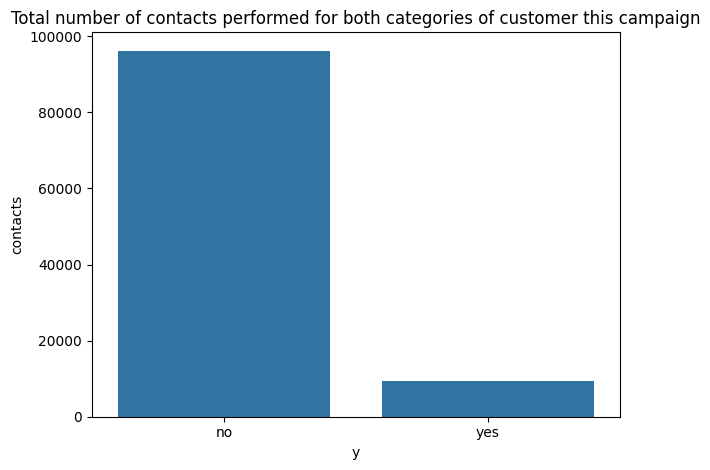

In [101]:
camp = pd.DataFrame(df.groupby('y', observed = False)['campaign'].sum()).reset_index()
plt.title('Total number of contacts performed for both categories of customer this campaign')
sns.barplot(x = 'y', y = 'campaign', data = camp)
plt.ylabel("contacts")
plt.tight_layout()
plt.show()

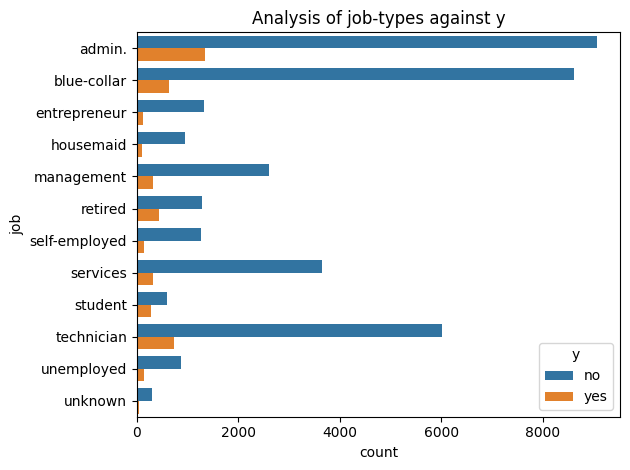

In [102]:
# Looking at relation between job and the output label y

joby = pd.DataFrame(df.groupby('job', observed = False).y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()
plt.title('Analysis of job-types against y')
sns.barplot(x = 'count', y = 'job', hue = 'y', data = joby)
plt.tight_layout()
plt.show()

**Looking at the jobs, 'admin', 'blue-collar' and 'technician' are the prominent jobs and most of the customers in these jobs have rejected the term deposit plan.

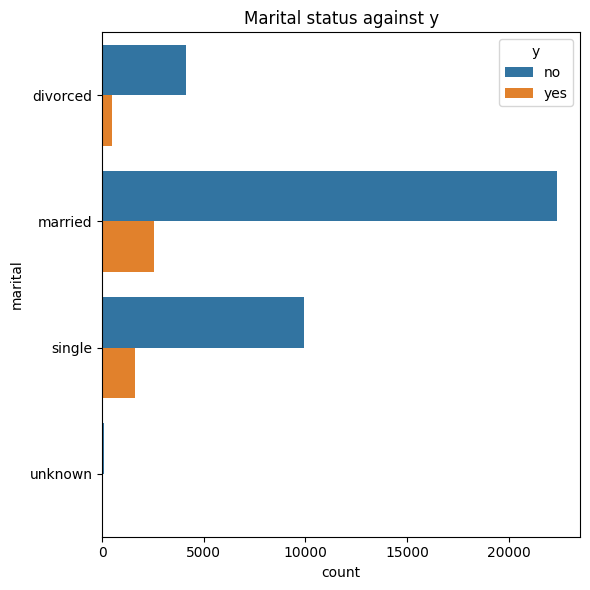

In [103]:
# Analyzing marital status and the output label

marital = pd.DataFrame(df.groupby('marital', observed = False).y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

# marital status vs y
plt.figure(figsize = (6,6))
plt.title('Marital status against y')
sns.barplot(x = 'count', y = 'marital', hue = 'y', data = marital)
plt.tight_layout()
plt.show()

married and single customers are the majority of the customer base and comparatively married customers have taken the term deposit

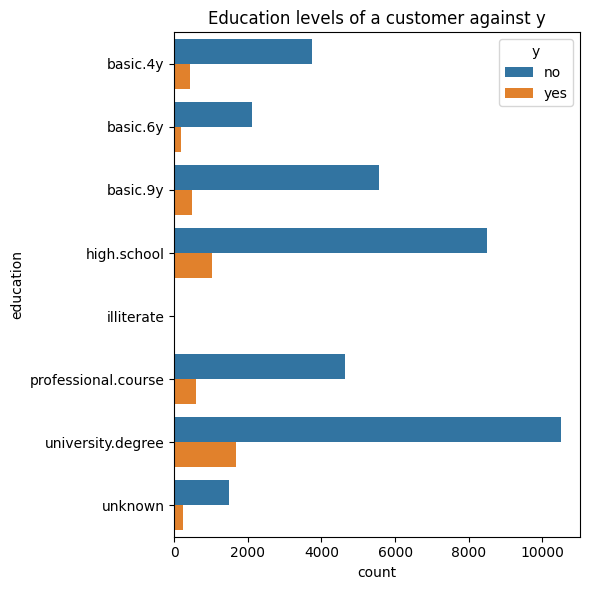

In [104]:
# Analyzing the different education levels of a customer against the choice of subscription

edu = pd.DataFrame(df.groupby('education', observed = False).y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (6,6))
plt.title('Education levels of a customer against y')
sns.barplot(x = 'count', y = 'education', hue = 'y', data = edu)
plt.tight_layout()
plt.show()

**Customers with university degree have subscribed to the term deposit more

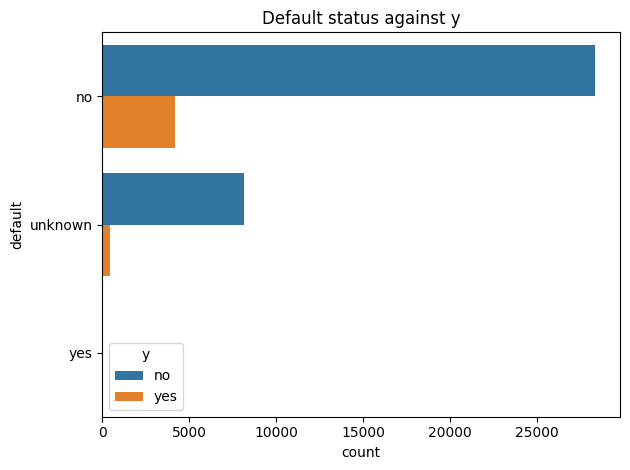

In [105]:
# Analyzing the default status against the choice of subscription
default = pd.DataFrame(df.groupby('default', observed = False).y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Default status against y')
sns.barplot(x = 'count', y = 'default', hue = 'y', data = default)
plt.tight_layout()
plt.show()

# There is no data for customers who have a default.

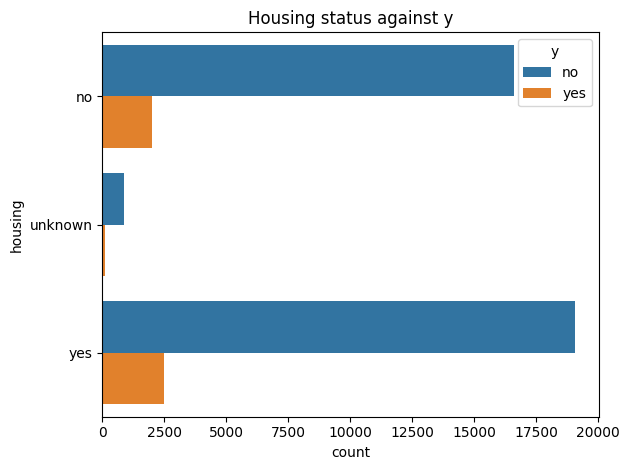

In [106]:
# Analyzing housing status and y
housing = pd.DataFrame(df.groupby('housing', observed = False).y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Housing status against y')
sns.barplot(x = 'count', y = 'housing', hue = 'y', data = housing)
plt.tight_layout()
plt.show()

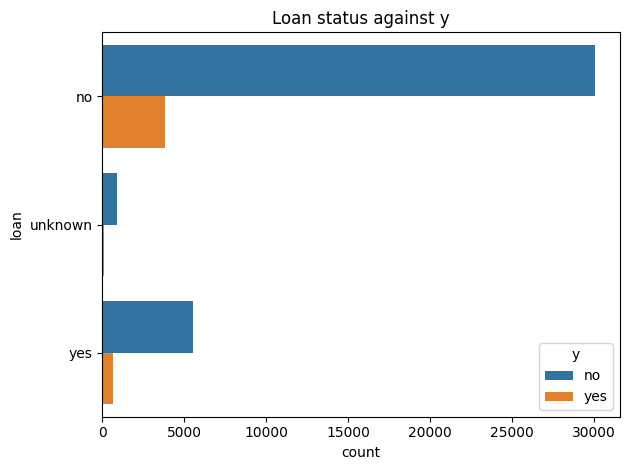

In [107]:
# analyzing loan status and y
loan = pd.DataFrame(df.groupby('loan', observed = False).y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Loan status against y')
sns.barplot(x = 'count', y = 'loan', hue = 'y', data = loan)
plt.tight_layout()
plt.show()

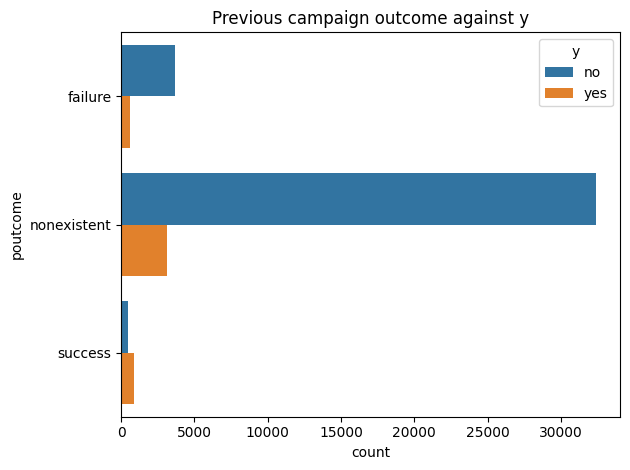

In [108]:
# analyzing poutcome and y

poutcome = pd.DataFrame(df.groupby('poutcome', observed = False).y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Previous campaign outcome against y')
sns.barplot(x = 'count', y = 'poutcome', hue = 'y', data = poutcome)
plt.tight_layout()
plt.show()    

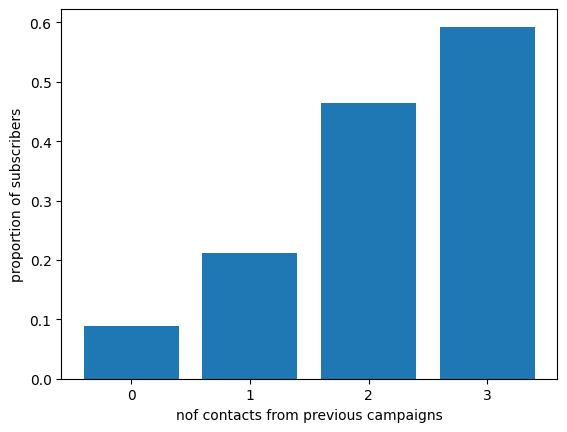

Sample proportion p1: 0.21201490901118175
Sample proportion p2: 0.08832381648898766
Z-score: 25.941063187546153
P-value: 0.0
Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among people who have been contacted one times is greater than among people who have been contacted zero times.

Sample proportion p1: 0.46419098143236076
Sample proportion p2: 0.21201490901118175
Z-score: 14.85788311632523
P-value: 0.0
Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among people who have been contacted two times is greater than among people who have been contacted one times.

Sample proportion p1: 0.5925925925925926
Sample proportion p2: 0.46419098143236076
Z-score: 3.3279162563126774
P-value: 0.00043749082153909935
Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among people who hav

In [109]:
previous_values_counts_yes = df[df["y"]=="yes"]["previous"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
previous_values_counts_no = df[df["y"]=="no"]["previous"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

previous_values_counts_yes = previous_values_counts_yes[[0,1,2,3]]
previous_values_counts_no = previous_values_counts_no[[0,1,2,3]]


proportions = previous_values_counts_yes/(previous_values_counts_no+previous_values_counts_yes)



plt.bar(proportions.index,proportions)
plt.xticks([0,1,2,3])
plt.ylabel("proportion of subscribers")
plt.xlabel("nof contacts from previous campaigns")
plt.show()


def compare_proportions_test(nof_group_a_yes, nof_group_a_no, nof_group_b_yes, nof_group_b_no, t1, t2):
    n1 = nof_group_a_yes+ nof_group_a_no
    n2 = nof_group_b_yes+ nof_group_b_no
    x1 = nof_group_a_yes  
    x2 = nof_group_b_yes 


    p1 = x1 / n1
    p2 = x2 / n2

    pooled_p = (x1 + x2) / (n1 + n2)

    standard_error = np.sqrt(pooled_p * (1 - pooled_p) * (1 / n1 + 1 / n2))

    z_score = (p1 - p2) / standard_error

    p_value = 1 - stats.norm.cdf(z_score)

    alpha = 0.05

    print("Sample proportion p1:", p1)
    print("Sample proportion p2:", p2)
    print("Z-score:", z_score)
    print("P-value:", p_value)

    if p_value < alpha:
        print("Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among people who have been contacted "+t2+" times is greater than among people who have been contacted "+t1+" times.")
    else:
        print("Fail to reject the null hypothesis. There is not sufficient evidence to support that the proportion of people who bought the product among people who have been contacted "+t2+" times is greater than among people who have been contacted "+t1+" times.")


ls = ["zero", "one", "two", "three"]

for i in range(3):
    nof_day_a_yes = previous_values_counts_yes[i+1]
    nof_day_a_no = previous_values_counts_no[i+1]

    nof_day_b_yes  = previous_values_counts_yes[i]
    nof_day_b_no = previous_values_counts_no[i]

    compare_proportions_test(nof_day_a_yes, nof_day_a_no, nof_day_b_yes, nof_day_b_no, ls[i], ls[i+1])
    print()


# Hypothesis: Each contact level from 0 to 3 leads to significantly higher proportion of clients buying the product


The bank should make sure to focus on clients who have been contacted the most times during previous campaigns.

Note: the more contacts performed in previous campaigns for this client the more likely they will buy it again.

Only (0-3) contact levels are shown because there are anomalies at the far end due to variance and small sample space.

campaign
1    0.130373
2    0.114591
3    0.107491
4    0.093962
5    0.075047
Name: count, dtype: float64


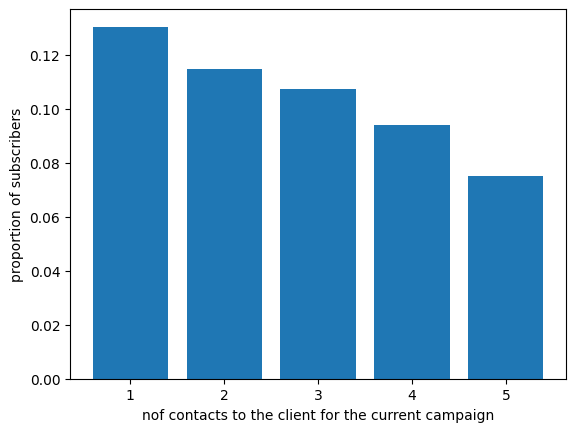

Sample proportion p1: 0.130373142792333
Sample proportion p2: 0.11459121877365631
Z-score: 3.8863331799361505
P-value: 5.088490273008617e-05
Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among people who have been contacted once during this campaign is greater than among people who have been contacted two times during this campaign.

Sample proportion p1: 0.130373142792333
Sample proportion p2: 0.10749063670411985
Z-score: 4.428853318620082
P-value: 4.736771157864972e-06
Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among people who have been contacted once during this campaign is greater than among people who have been contacted three times during this campaign.


In [110]:
previous_values_counts_yes = df[df["y"]=="yes"]["campaign"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
previous_values_counts_no = df[df["y"]=="no"]["campaign"].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)


proportions = (previous_values_counts_yes/(previous_values_counts_no+previous_values_counts_yes))[[1,2,3,4,5]]

print(proportions)

# print(len(previous_values_counts_yes))
# print(len(previous_values_counts_no))


plt.bar(proportions.index,proportions)
plt.ylabel("proportion of subscribers")
plt.xlabel("nof contacts to the client for the current campaign")
plt.show()


def compare_proportions_test(nof_group_a_yes, nof_group_a_no, nof_group_b_yes, nof_group_b_no, t1):
    n1 = nof_group_a_yes+ nof_group_a_no
    n2 = nof_group_b_yes+ nof_group_b_no
    x1 = nof_group_a_yes  
    x2 = nof_group_b_yes 


    p1 = x1 / n1
    p2 = x2 / n2

    pooled_p = (x1 + x2) / (n1 + n2)

    standard_error = np.sqrt(pooled_p * (1 - pooled_p) * (1 / n1 + 1 / n2))

    z_score = (p1 - p2) / standard_error

    p_value = 1 - stats.norm.cdf(z_score)

    alpha = 0.05

    print("Sample proportion p1:", p1)
    print("Sample proportion p2:", p2)
    print("Z-score:", z_score)
    print("P-value:", p_value)

    if p_value < alpha:
        print("Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among people who have been contacted once during this campaign is greater than among people who have been contacted " +t1+ " times during this campaign.")
    else:
        print("Fail to reject the null hypothesis. There is not sufficient evidence to support that the proportion of people who bought the product among people who have been contacted once during this campaign is greater than among people who have been contacted " +t1+ " times during this campaign.")



compare_proportions_test(previous_values_counts_yes[1], previous_values_counts_no[1], previous_values_counts_yes[2], previous_values_counts_no[2], "two")
print()
compare_proportions_test(previous_values_counts_yes[1], previous_values_counts_no[1], previous_values_counts_yes[3], previous_values_counts_no[3], "three")


# Hypothesis: The first contact leads to the highest percentage of purchases out of any other contact level


The bank should make sure to focus on contacting those who have not been contacted for the current campaign.

Calling again and again still leads to more customers buying the product but the priority should be customers that haven't been contacted.

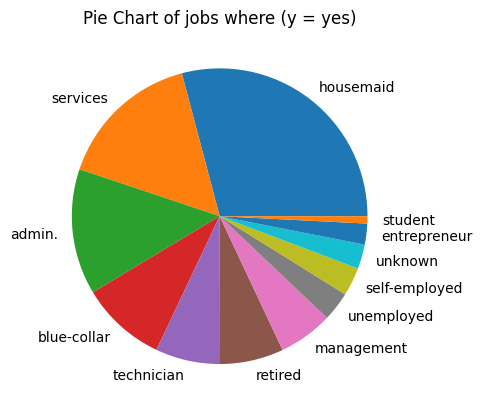

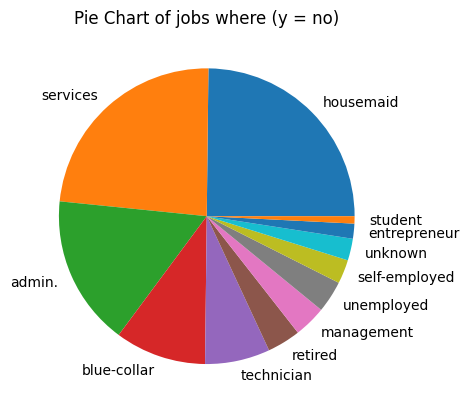

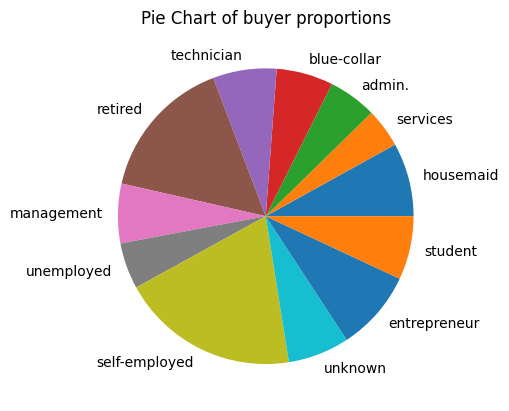

In [111]:
jobs = df['job'].unique()
job_counts_yes = df[df['y'] == 'yes']['job'].value_counts()
plt.pie(job_counts_yes, labels=jobs)
plt.title('Pie Chart of jobs where (y = yes)')
plt.show()


job_counts_no = df[df['y'] == 'no']['job'].value_counts()
plt.pie(job_counts_no, labels=jobs)
plt.title('Pie Chart of jobs where (y = no)')
plt.show()


# Better way to judge which kinds of jobs to focus on:
proportions = job_counts_yes/(job_counts_yes+job_counts_no)
plt.pie(proportions, labels=jobs)
plt.title('Pie Chart of buyer proportions')
plt.show()

# The last chart gives real value to the portions of the pie. Each slice represents the value to the overall pie for the proportion of clients who bought the product for a job category to the full number of clients in that job category.
# You can see that clients in services actually buy the least often even though they have a high frequency for those who bought.

It would be advantageous to focus on advertising to certain job categories that represent a larger piece of the pie.

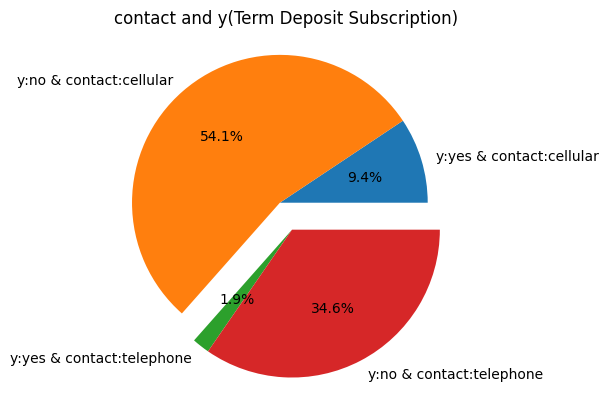

Sample proportion p1: 0.14738855940309928
Sample proportion p2: 0.05232364869357091
Z-score: 29.37739625383253
P-value: 0.0
Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among cell phone users is greater than among non-cell phone users.


In [112]:
piece_1 = len(df[(df['y'] == 'yes') & (df['contact'] == 'cellular')].values)
piece_2 = len(df[(df['y'] == 'no') & (df['contact'] == 'cellular')].values)
piece_3 = len(df[(df['y'] == 'yes') & (df['contact'] == 'telephone')].values)
piece_4 = len(df[(df['y'] == 'no') & (df['contact'] == 'telephone')].values)


labels = ['y:yes & contact:cellular','y:no & contact:cellular', 'y:yes & contact:telephone', 'y:no & contact:telephone']

vals = [piece_1,piece_2,piece_3,piece_4]


wedges, texts, percs = plt.pie(vals, labels=labels,autopct="%1.1f%%")
plt.title("contact and y(Term Deposit Subscription)")


groups = [[0, 1], [2,3]]
radfraction = 0.1
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)

plt.show()



def compare_proportions_test(nof_group_a_yes, nof_group_a_no, nof_group_b_yes, nof_group_b_no):
    n1 = nof_group_a_yes+ nof_group_a_no
    n2 = nof_group_b_yes+ nof_group_b_no
    x1 = nof_group_a_yes  
    x2 = nof_group_b_yes 


    p1 = x1 / n1
    p2 = x2 / n2

    pooled_p = (x1 + x2) / (n1 + n2)

    standard_error = np.sqrt(pooled_p * (1 - pooled_p) * (1 / n1 + 1 / n2))

    z_score = (p1 - p2) / standard_error

    p_value = 1 - stats.norm.cdf(z_score)

    alpha = 0.05

    print("Sample proportion p1:", p1)
    print("Sample proportion p2:", p2)
    print("Z-score:", z_score)
    print("P-value:", p_value)

    if p_value < alpha:
        print("Reject the null hypothesis. There is sufficient evidence to support that the proportion of people who bought the product among cell phone users is greater than among non-cell phone users.")
    else:
        print("Fail to reject the null hypothesis. There is not sufficient evidence to support that the proportion of people who bought the product among cell phone users is greater than among non-cell phone users.")



compare_proportions_test(piece_1, piece_2, piece_3, piece_4)


# How to interpret this pie chart?
# The top detached piece represents total percentage of clients with cellular phones
# The bottom detached piece represents total percentage of clients with telephones


# Hypothesis: Is the proportion of clients that bought the term deposit product with cellular phones to the entire population...
# of clients wth cellular phones significantly greater than the proportion of clients that bought the term deposit product with telephones...
# to the entire population of clients with telephones

Focusing on customers that use cellular phones can be advantageous

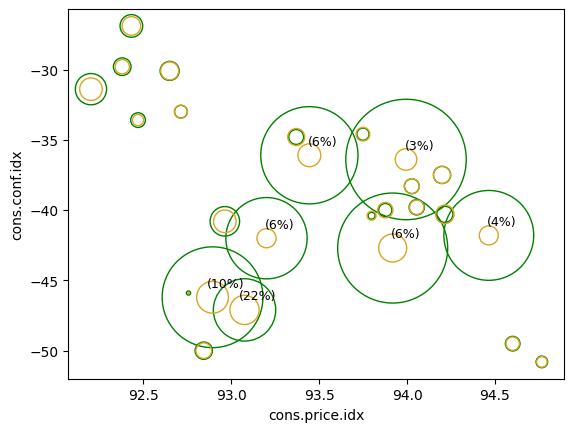

Null Hypothesis: There is no difference between the distributions of the numeric variable X for the two groups defined by y
Alt Hypothesis: There is a difference between the distributions of X for the two groups defined by y.
X is a place holder for the independent variable being tested and y is the target boolean variable (y)
cons.price.idx cross y: 1.4427607247518957e-135 < .05 -> reject the NULL hypothesis
cons.conf.idx cross y: 7.10134876776393e-17 < .05 -> reject the NULL hypothesis


In [113]:

x1 = list(df[df["y"]=="no"]["cons.price.idx"])
y1 = list(df[df["y"]=="no"]["cons.conf.idx"])
x2 = list(df[df["y"]=="yes"]["cons.price.idx"])
y2 = list(df[df["y"]=="yes"]["cons.conf.idx"])



cords_to_size_1 = dict()
for x,y in zip(x1,y1):
    if (x,y) in cords_to_size_1.keys():
        cords_to_size_1[(x,y)] += 1
    else:
        cords_to_size_1[(x,y)] = 1


cords_to_size_2 = dict()
for x,y in zip(x2,y2):
    if (x, y) in cords_to_size_2.keys():
        cords_to_size_2[(x,y)] += 1
    else:
        cords_to_size_2[(x,y)] = 1


x_vals = []
y_vals = []


for key in cords_to_size_1.keys():
    x_vals.append(key[0])
    y_vals.append(key[1])


sorted_cords_to_size_1 = dict(sorted(cords_to_size_1.items(), key=lambda item: item[1], reverse=True))
cords_to_7_biggest = dict(islice(sorted_cords_to_size_1.items(), 7))


sizes_1 = []
sizes_2 = []

for (c1, c2) in zip(x_vals, y_vals):
    if((c1, c2) in cords_to_7_biggest.keys()):
        plt.text(c1+.075, c2+.75, f'({round((cords_to_size_2[(c1, c2)]/(cords_to_size_1[(c1, c2)]))*100)}%)', fontsize=9, ha = 'center')
    sizes_1.append(cords_to_size_1[(c1, c2)])
    sizes_2.append(cords_to_size_2[(c1, c2)])



plt.scatter(x_vals,y_vals,color='green',facecolors='none', s = sizes_1)
plt.scatter(x_vals,y_vals,color='goldenrod',facecolors='none', s = sizes_2)
plt.xlabel("cons.price.idx")
plt.ylabel("cons.conf.idx")
plt.show()


print("Null Hypothesis: There is no difference between the distributions of the numeric variable X for the two groups defined by y")
print("Alt Hypothesis: There is a difference between the distributions of X for the two groups defined by y.")
print("X is a place holder for the independent variable being tested and y is the target boolean variable (y)")


_, p_value = mannwhitneyu(x1,x2)
print("cons.price.idx cross y:", p_value, "< .05 -> reject the NULL hypothesis")
_, p_value = mannwhitneyu(y1,y2)
print("cons.conf.idx cross y:", p_value, "< .05 -> reject the NULL hypothesis")



# How to interpret the graph in this cell and the cell below?:

# Each point is a value of cons.price.idx and cons.conf.idx
# There are bubbles for each point representing buyers and non buyers
# The size of the green bubbles represent the number of clients who did not buy the product. 
# The size of the gold bubbles represents the number of clients who did buy the product.
# Some bubbles have percentages which indicate the percentage of how much the yellow bubble is of the green bubble.
# this is (people who bought/people who didn't)*100


# There are 7 bubbles that have a significantly larger number of clients who did not purchase.


# For the other points (with one exception) the number of people who bought is a lot more similar to the number of people who didn't
# There are also points where there is more people who bought than people who didn't


# From observing the graph it is hard to indicate a pattern.

# There are points that have similar values of "cons.price.idx" and "cons.conf.idx"...
# but they dont necessarily have similar number of people who bought, people did not buy, or ratios for people who bought to people who didn't

# The companies history is linked to these points. Success in the companies history is more likely the determining factors that produces more buyers
# rather than it being related to the combination of cons.price.idx and cons.conf.idx


# Hypothesis Tests: 
# The Mann-Whitney U test is used to determine if there is a difference between the distributions of X for the two groups defined by y. 
# It is impervious to data imbalance in the target variable and it does not require the distribution to be normal.
# I think it makes sense to do this test for all 5 of the values that are not related to the client: cons.price.idx, cons.conf.idx, emp.var.rate, nr.employed, euribor3m
# It helps answer the question: do they matter at all?.
# From testing this cell and below, they all seem to matter.
# There usage in a model has yet to be determined.

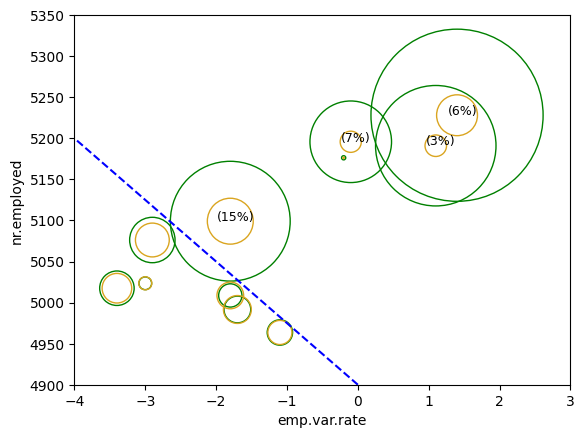

Null Hypothesis: There is no difference between the distributions of the numeric variable X for the two groups defined by y
Alt Hypothesis: There is a difference between the distributions of X for the two groups defined by y.
X is a place holder for the independent variable being tested and y is the target boolean variable (y)
emp.var.rate cross y: 0.0 < .05 -> reject the NULL hypothesis
nr.employed cross y: 0.0 < .05 -> reject the NULL hypothesis
euribor3m cross y: 0.0 < .05 -> reject the NULL hypothesis


In [114]:
x1 = list(df[df["y"]=="no"]["emp.var.rate"])
y1 = list(df[df["y"]=="no"]["nr.employed"])
x2 = list(df[df["y"]=="yes"]["emp.var.rate"])
y2 = list(df[df["y"]=="yes"]["nr.employed"])


cords_to_size_1 = dict()
for x,y in zip(x1,y1):
    if (x,y) in cords_to_size_1.keys():
        cords_to_size_1[(x,y)] += 1
    else:
        cords_to_size_1[(x,y)] = 1


cords_to_size_2 = dict()
for x,y in zip(x2,y2):
    if (x, y) in cords_to_size_2.keys():
        cords_to_size_2[(x,y)] += 1
    else:
        cords_to_size_2[(x,y)] = 1


x_vals = []
y_vals = []


for key in cords_to_size_1.keys():
    x_vals.append(key[0])
    y_vals.append(key[1])


sorted_cords_to_size_1 = dict(sorted(cords_to_size_1.items(), key=lambda item: item[1], reverse=True))
cords_to_4_biggest = dict(islice(sorted_cords_to_size_1.items(), 4))


sizes_1 = []
sizes_2 = []

for (c1, c2) in zip(x_vals, y_vals):
    if((c1, c2) in cords_to_4_biggest.keys()):
        plt.text(c1+.075, c2+.75, f'({round((cords_to_size_2[(c1, c2)]/(cords_to_size_1[(c1, c2)]))*100)}%)', fontsize=9, ha = 'center')
    sizes_1.append(cords_to_size_1[(c1, c2)])
    sizes_2.append(cords_to_size_2[(c1, c2)])



plt.xlim(-4, 3)
plt.ylim(4900, 5350)
plt.scatter(x_vals,y_vals,color='green',facecolors='none', s = sizes_1)
plt.scatter(x_vals,y_vals,color='goldenrod',facecolors='none', s = sizes_2)
plt.plot([0,-4], [4900, 5200], color='b', linestyle='--')
plt.xlabel("emp.var.rate")
plt.ylabel("nr.employed")
plt.show()


#Mann-Whitney U test (see description above)
print("Null Hypothesis: There is no difference between the distributions of the numeric variable X for the two groups defined by y")
print("Alt Hypothesis: There is a difference between the distributions of X for the two groups defined by y.")
print("X is a place holder for the independent variable being tested and y is the target boolean variable (y)")
_, p_value = mannwhitneyu(x1,x2)
print("emp.var.rate cross y:", p_value, "< .05 -> reject the NULL hypothesis")
_, p_value = mannwhitneyu(y1,y2)
print("nr.employed cross y:", p_value, "< .05 -> reject the NULL hypothesis")
a = list(df[df["y"]=="no"]["euribor3m"])
b = list(df[df["y"]=="yes"]["euribor3m"])
_, p_value = mannwhitneyu(a,b)
print("euribor3m cross y:", p_value, "< .05 -> reject the NULL hypothesis")


# See the cell above for graph interpretation

Unlike the previous cell there is some discernable linear boundary here that separates most of "high purchase percentage points" from the "low purchase percentage points"

This generally means that it has been found when emp.var.rate and nr.employed are low, purchase percentage is higher.

It might be a good idea to maximize campaign efforts under these circumstances.

In [115]:

# data = df[df["y"]=='yes']["age"].sample(500)
data = np.log(df[df["y"]=='yes']["age"]+1).sample(500)

statistic, p_value = stats.shapiro(data)

print("Shapiro-Wilk Test Statistic:",statistic)
print("P-value:",p_value)

alpha = 0.05
if p_value > alpha:
    print("Sample looks normal (fail to reject H0)\n")
else:
    print("Sample does not look normal (reject H0)\n")



# data = df[df["y"]=='no']["age"].sample(500)
data = np.log(df[df["y"]=='no']["age"]+1).sample(500)

statistic, p_value = stats.shapiro(data)

print("Shapiro-Wilk Test Statistic:",statistic)
print("P-value:",p_value)

alpha = 0.05
if p_value > alpha:
    print("Sample looks normal (fail to reject H0)\n")
else:
    print("Sample does not look normal (reject H0)\n")


_, p_value = mannwhitneyu(df[df["y"]=='no']["age"],df[df["y"]=='yes']["age"], alternative='greater')

print("Mann Whitney U test")

print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The distribution of age associated with people who did not buy the term deposit is greater than the distribution of age associated with people who did buy the product.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


Shapiro-Wilk Test Statistic: 0.9850467109827427
P-value: 5.152529834832207e-05
Sample does not look normal (reject H0)

Shapiro-Wilk Test Statistic: 0.9878744115059309
P-value: 0.0003631984264873081
Sample does not look normal (reject H0)

Mann Whitney U test
p-value: 0.00781888870286014
Reject the null hypothesis. The distribution of age associated with people who did not buy the term deposit is greater than the distribution of age associated with people who did buy the product.


This shows that age is abnormal for both buyers an non buyers even with log transformation. This means it is impossible to test with t-test and tests alike. 

The Mann Whitney U tets is done instead. This shows that the distribution of ages for people who did not buy the product is greater than the age distribution of people who did buy the product.

This means focussing on the younger population can have its advantages.

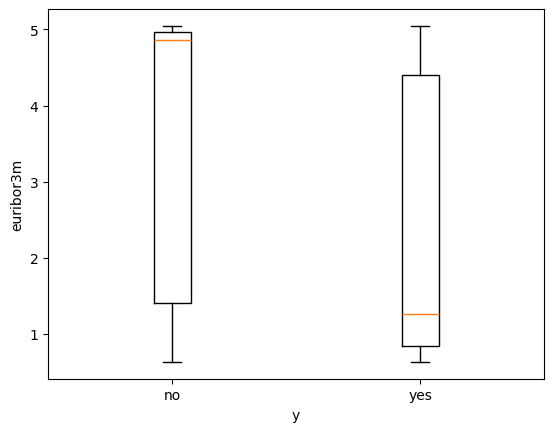

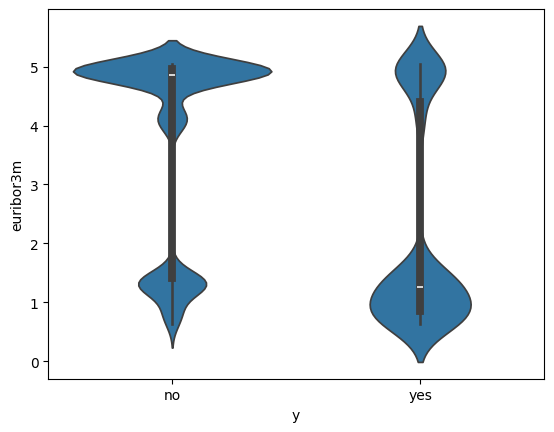

p-value: 0.0
Reject the null hypothesis. The distribution of euribor3m associated with people who did not buy the term deposit is greater than the distribution of euribor3m associated with people who did buy the product.


In [116]:

no_list = df['euribor3m'][df['y']=="no"]
yes_list = df['euribor3m'][df['y']=="yes"]

plt.boxplot((no_list, yes_list), tick_labels = ("no","yes"))
plt.ylabel('euribor3m')
plt.xlabel("y")
plt.show()

sns.violinplot(x='y', y='euribor3m', data=df[['y', 'euribor3m']]) 

plt.show()



_, p_value = mannwhitneyu(no_list, yes_list, alternative='greater')

print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The distribution of euribor3m associated with people who did not buy the term deposit is greater than the distribution of euribor3m associated with people who did buy the product.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


euribor3m usually changes gradually so it is hard to make the best use of this information. 

It might be good to put more resources into campaigns when this values is low.

Three best pdays: [13, 6, 3]
Their corresponding buy rates: [np.float64(0.7777777777777778), np.float64(0.7014563106796117), np.float64(0.6788154897494305)]


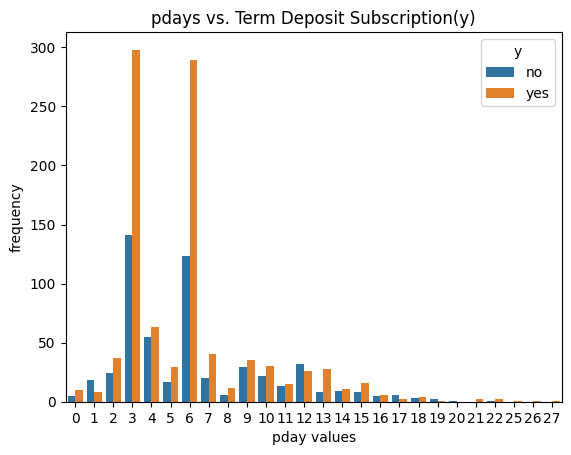

Shapiro-Wilk Test Statistic: 0.9420149659990795
P-value: 4.628978102222852e-13
Sample does not look normal (reject H0)


In [117]:

keys_set = set(list(df[(df["pdays"]!=999) & (df["y"]== 'yes')]["pdays"].unique())) | set(list(df[(df["pdays"]!=999) & (df["y"]== 'no')]["pdays"].unique()))

sorted_keys = sorted(list(keys_set))

yes_pday_values = df[(df["pdays"]!=999) & (df["y"]== 'yes')]["pdays"].value_counts()
no_pday_values = df[(df["pdays"]!=999) & (df["y"]== 'no')]["pdays"].value_counts()


for value in sorted_keys:
    if value not in yes_pday_values.keys():
        yes_pday_values[value] = 0
    if value not in no_pday_values.keys():
        no_pday_values[value] = 0


yes_pday_values.reindex(sorted_keys)
no_pday_values.reindex(sorted_keys)

proportions = yes_pday_values/(no_pday_values+yes_pday_values)

proportions_sorted = proportions.sort_values(ascending= False)


three_best = pd.Series()
i =0
for index, value in proportions_sorted.items():
    if value ==np.inf or value ==1:
        continue
    else:
        three_best[index] = value
    i+=1
    if(i==3):
        break

print("Three best pdays:", list(three_best.index))
print("Their corresponding buy rates:", list(three_best.values))

sns.countplot(data=df[df["pdays"]!=999], x='pdays', hue='y')


plt.title("pdays vs. Term Deposit Subscription(y)")
plt.xlabel("pday values")
plt.ylabel("frequency")
plt.show()


data = np.log(df[df["pdays"]!=999]["pdays"]+1).sample(500)


statistic, p_value = stats.shapiro(data)

print("Shapiro-Wilk Test Statistic:",statistic)
print("P-value:",p_value)

alpha = 0.05
if p_value > alpha:
    print("Sample looks normal (fail to reject H0)")
else:
    print("Sample does not look normal (reject H0)")



Focusing on contacting clients with these specific number of days since the last contact in the last campaign may be favorable.